In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Chargement du fichier CSV : https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
file_path = "diabetes.csv"
df = pd.read_csv(file_path)

In [3]:
# Afficher les premières lignes du dataset
display(df.head())

# Afficher des informations générales sur le dataset
print(df.info())

# Statistiques descriptives
display(df.describe())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
grouped_by_outcome = df.groupby('Outcome').mean()  # Moyennes par groupe (diabétique/non-diabetique)
display(grouped_by_outcome)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
sorted_by_glucose = grouped_by_outcome.sort_values('Glucose', ascending=False)
display(sorted_by_glucose)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000


In [4]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

# Remplir les valeurs manquantes avec la moyenne (pour les colonnes numériques)
df.fillna(df.mean(), inplace=True)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


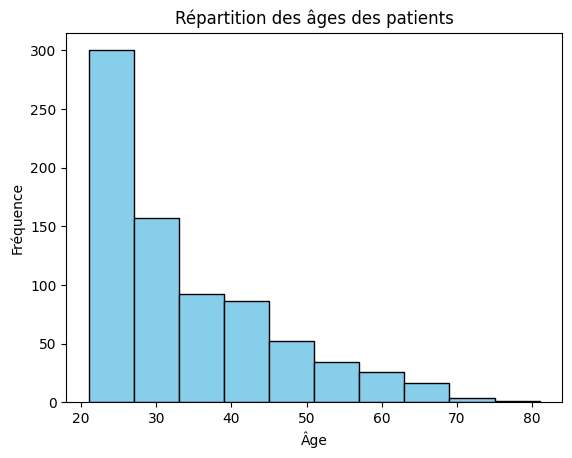

In [5]:
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Répartition des âges des patients')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()


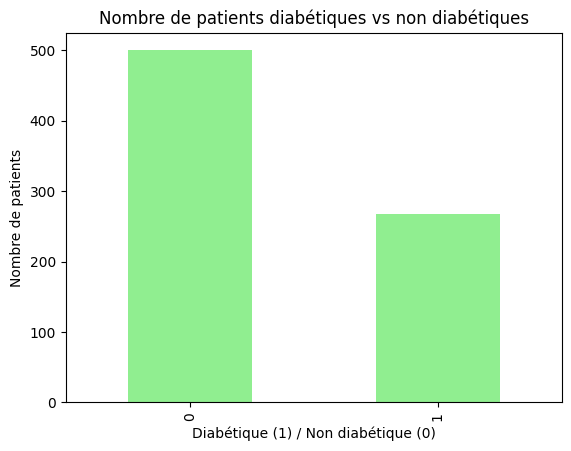

In [ ]:
df['Outcome'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Nombre de patients diabétiques vs non diabétiques')
plt.xlabel('Diabétique (1) / Non diabétique (0)')
plt.ylabel('Nombre de patients')
plt.show()


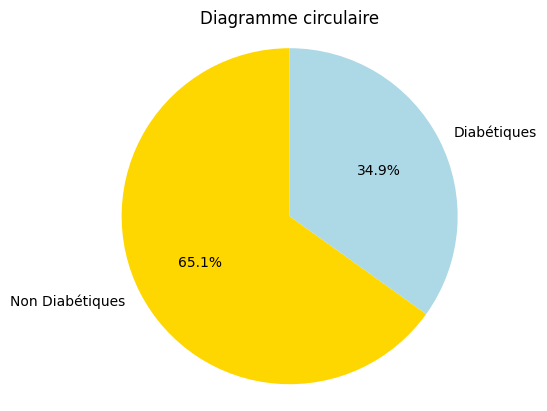

In [7]:
#df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])
#plt.pie ()
#plt.title('Répartition des patients diabétiques et non diabétiques')
#plt.ylabel('')
#plt.show()

labels = ["Non Diabétiques", "Diabétiques", ]
sizes = df["Outcome"].value_counts()
colors = ["gold", "lightblue"]

plt.pie(sizes, labels=labels, colors=colors, autopct="%2.1f%%", startangle=90)
plt.axis("equal")
plt.title("Diagramme circulaire")
plt.show()


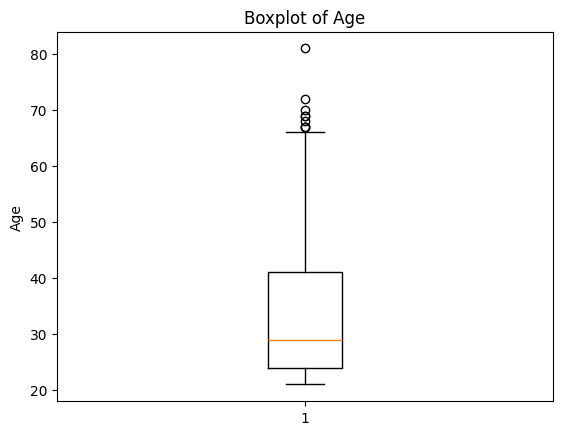

In [10]:
plt.boxplot(df['Age'])
plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()


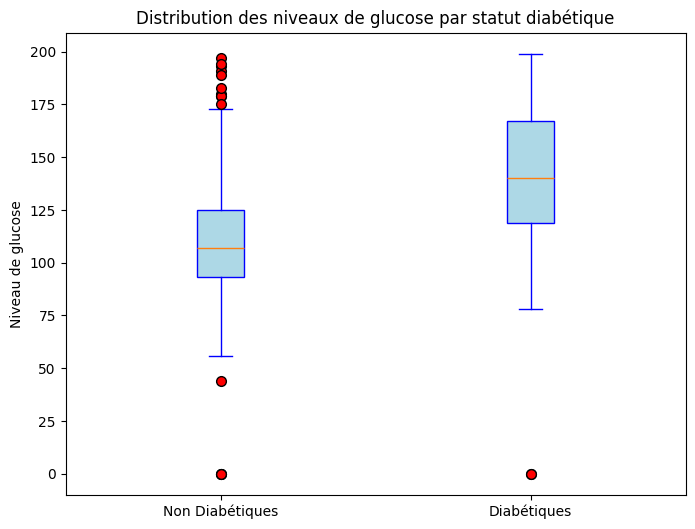

In [ ]:

# Créer un boxplot avec matplotlib
plt.figure(figsize=(8, 6))
plt.boxplot([df[df['Outcome'] == 0]['Glucose'], df[df['Outcome'] == 1]['Glucose']],
            labels=['Non Diabétiques', 'Diabétiques'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='blue'),
            whiskerprops=dict(color='blue'),
            capprops=dict(color='blue'),
            flierprops=dict(markerfacecolor='red', marker='o', markersize=7))

# Ajouter un titre et des étiquettes
plt.title('Distribution des niveaux de glucose par statut diabétique')
plt.ylabel('Niveau de glucose')
plt.xticks([1, 2], ['Non Diabétiques', 'Diabétiques'])

# Afficher le graphique
plt.show()



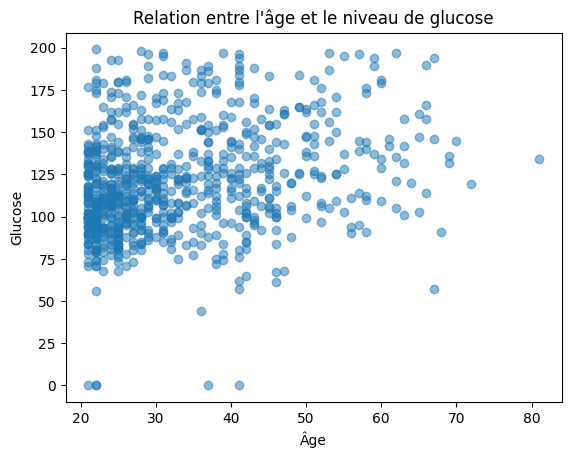

In [12]:
plt.scatter(df['Age'], df['Glucose'], alpha=0.5)
plt.title('Relation entre l\'âge et le niveau de glucose')
plt.xlabel('Âge')
plt.ylabel('Glucose')
plt.show()


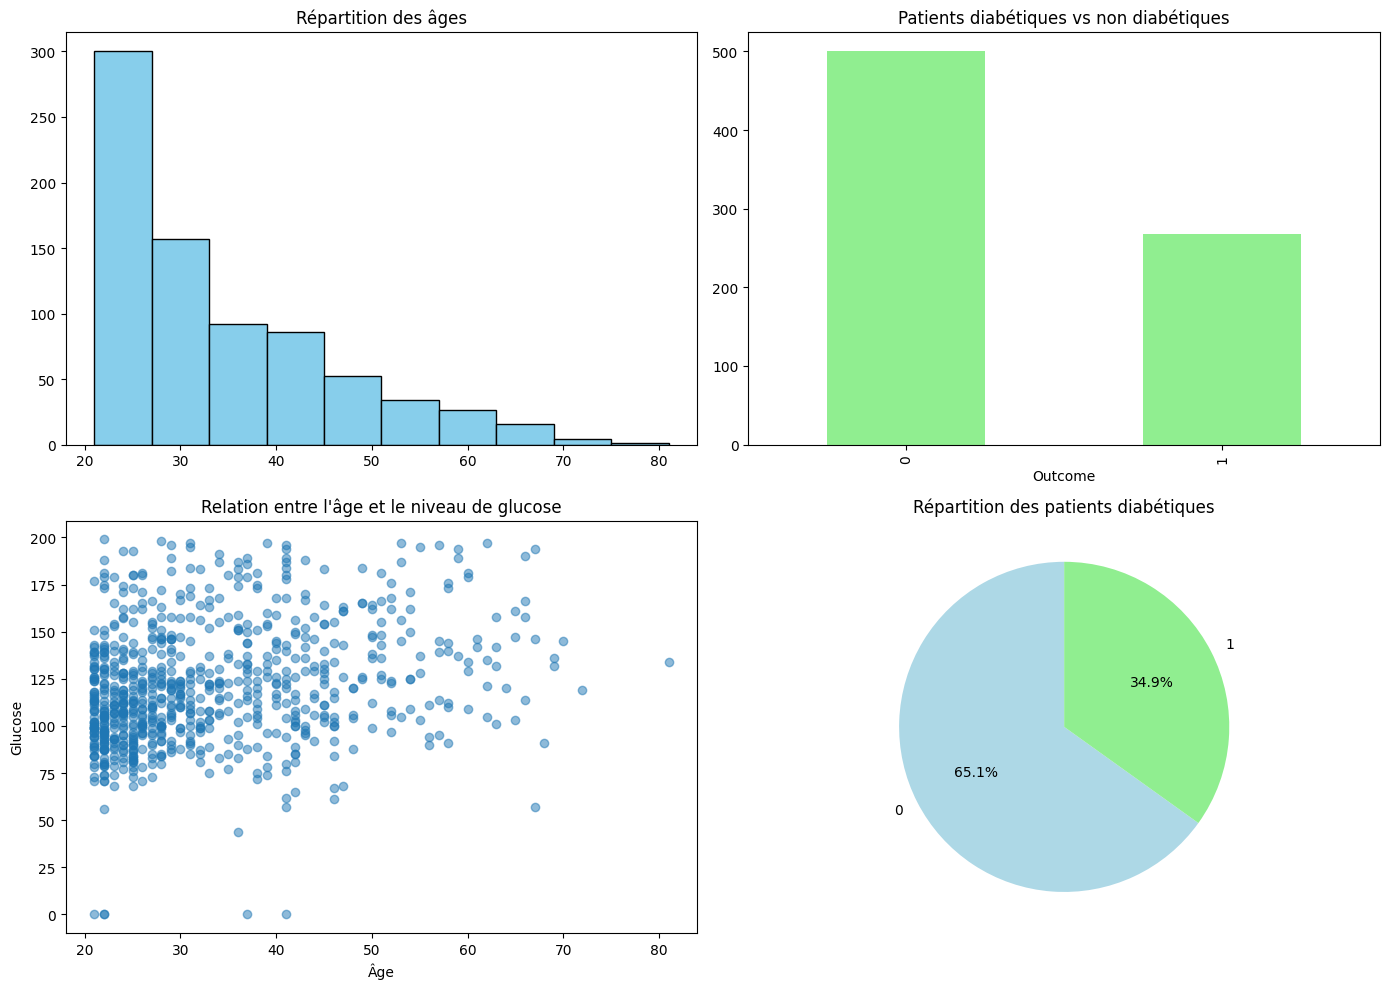

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))


# Histogramme des âges
axes[0, 0].hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Répartition des âges')

# Diagramme à barres des patients diabétiques et non diabétiques
df['Outcome'].value_counts().plot(kind='bar', color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Patients diabétiques vs non diabétiques')

# ...
axes[1, 0].scatter(df['Age'], df['Glucose'], alpha=0.5)
axes[1, 0].set_title('Relation entre l\'âge et le niveau de glucose')
axes[1, 0].set_xlabel('Âge')
axes[1, 0].set_ylabel ('Glucose')




# Diagramme circulaire de la répartition des patients diabétiques
df['Outcome'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=axes[1, 1], colors=['lightblue', 'lightgreen'])
axes[1, 1].set_title('Répartition des patients diabétiques')
axes[1, 1].set_ylabel('')

plt.tight_layout()
plt.show()


Outcome
0    500
1    268
Name: count, dtype: int64


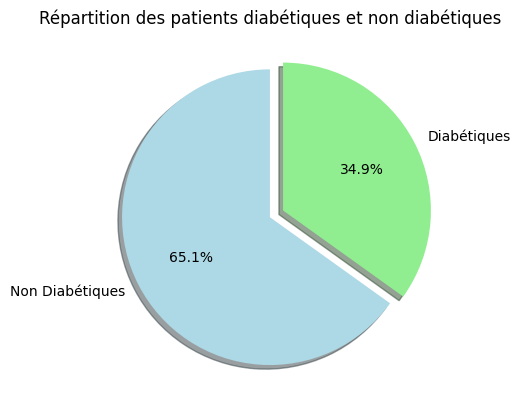

In [ ]:


# Exemple de données
labels = ['Non Diabétiques', 'Diabétiques']  # Catégories
sizes = df['Outcome'].value_counts()  # Nombre d'occurrences ou proportions
colors = ['lightblue', 'lightgreen']  # Couleurs pour les catégories
explode = (0, 0.1)  # Décaler le deuxième segment

# Création du diagramme circulaire
#pieChart = axes[1, 1]
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Affiche les pourcentages avec un chiffre après la virgule
    startangle=90,
    colors=colors,
    explode=explode,
    shadow=True
)

# Ajouter un titre
plt.title('Répartition des patients diabétiques et non diabétiques')
plt.show()



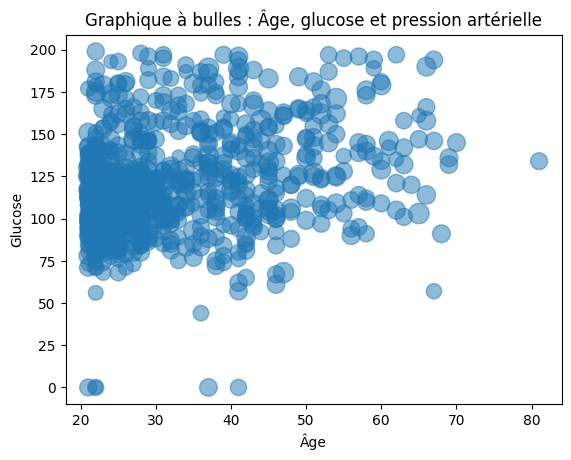

In [ ]:
plt.scatter(df['Age'], df['Glucose'], s=df['BloodPressure']*2, alpha=0.5)
plt.title('Graphique à bulles : Âge, glucose et pression artérielle')
plt.xlabel('Âge')
plt.ylabel('Glucose')
plt.show()


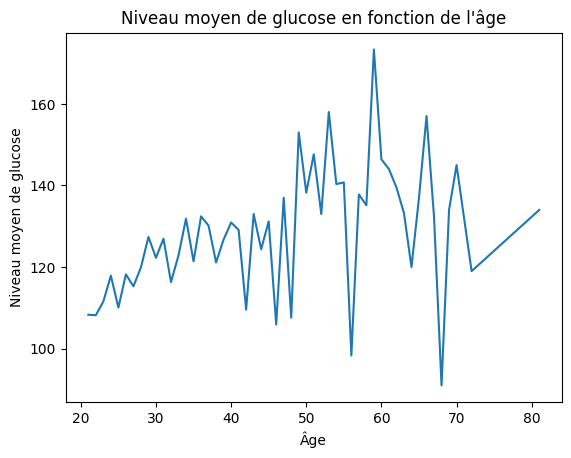

In [ ]:
df.groupby('Age')['Glucose'].mean().plot(kind='line')
plt.title('Niveau moyen de glucose en fonction de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Niveau moyen de glucose')

# Sauvegarder l'image
plt.savefig("graphique.png")  # Sauvegarde en PNG

plt.show()


In [ ]:
# Sauvegarder l'image
plt.savefig("graphique.png")  # Sauvegarde en PNG

# Afficher le graphique
plt.show()